## 1- importer les bibliothéques

In [229]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils import resample
from keras.models import load_model
from scipy import stats
from matplotlib.ticker import MultipleLocator as Ml
from matplotlib.ticker import ScalarFormatter as SF
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model

## 2- fixer les path des données

In [223]:
path_model="/kaggle/input/model3splits/ModelSjogren3splits.h5"
image_path="/kaggle/input/sjdata/DATA_(512,512)/sj_data/019.jpg"
sj_path="/kaggle/input/sjdata/DATA_(512,512)/sj_data"

In [224]:
x_test=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")

In [225]:
y_test=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")

In [15]:

# Charger l'image
image = cv2.imread(image_path)

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_with_channel = np.expand_dims(gray_image, axis=-1)
# Convertir l'image en tableau NumPy
input_image = np.array(gray_image)


# importer le modéle

In [203]:
# Charger le modèle
model = load_model(path_model)

In [204]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [206]:

img_tensor = preprocessing.image.img_to_array(input_image)
img_tensor = np.expand_dims(img_tensor, axis=0)

In [207]:
img_tensor.shape

(1, 512, 512, 1)

In [232]:
image_size = 512
conv_layer = model.get_layer("conv2d_4")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

In [233]:
conv, pred = heatmap_model.predict(img_tensor)

1/1 [==============================] - 0s 103ms/step


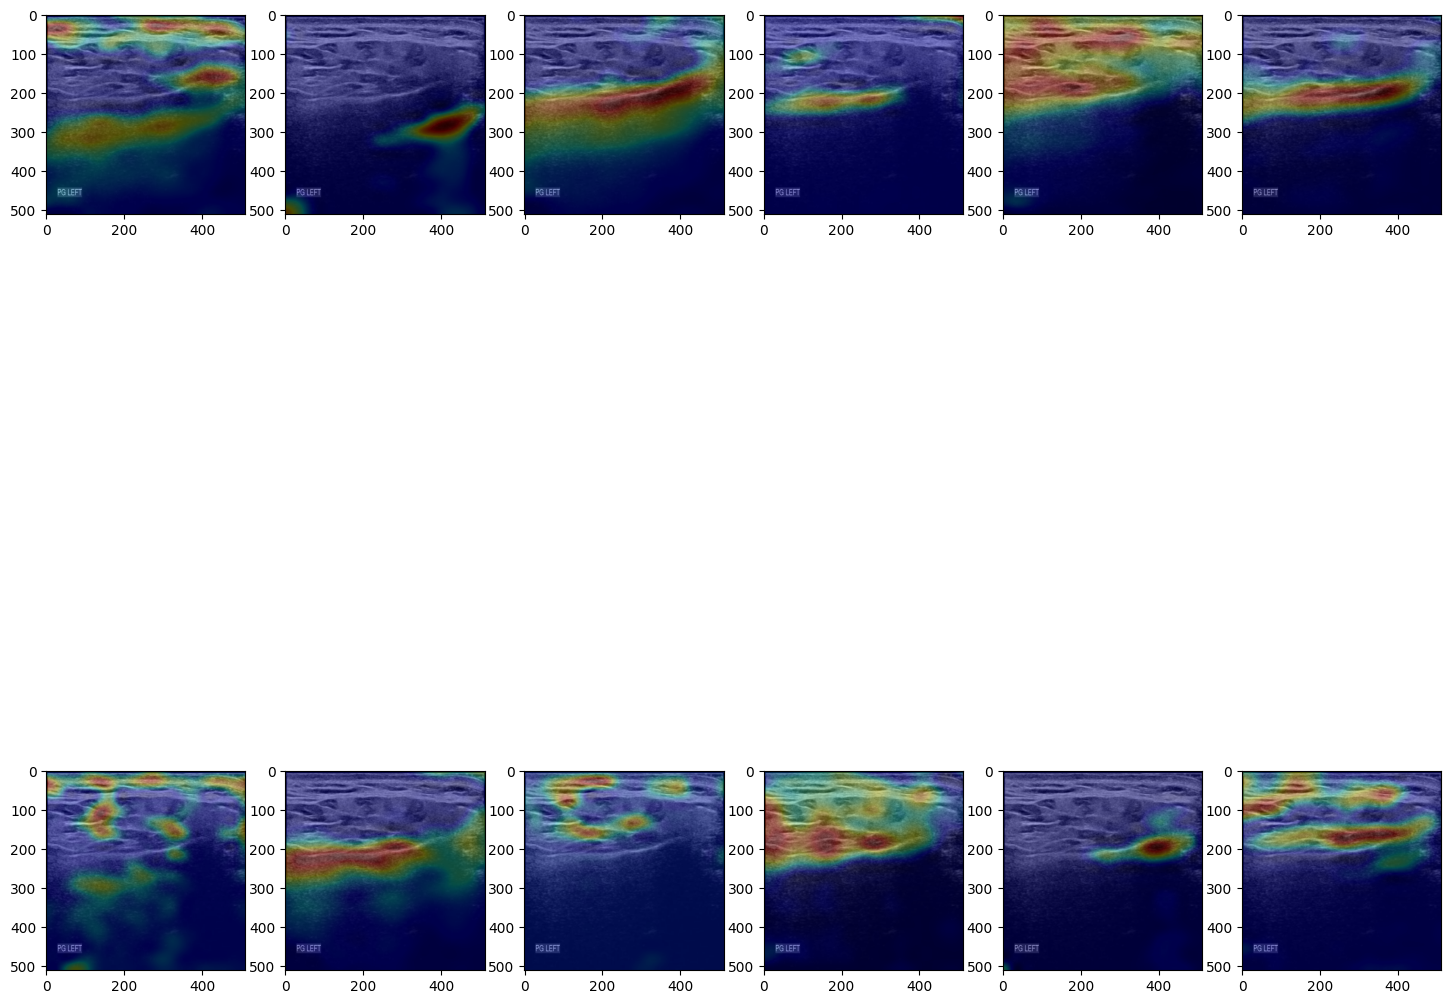

In [234]:
from scipy.ndimage import zoom
scale = 512 / 20
plt.figure(figsize=(18,18))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(image)
    plt.imshow(zoom(conv[0, :,:,i], zoom=(scale, scale)), cmap='jet', alpha=0.3)

In [235]:
target = np.argmax(pred, axis=1).squeeze()
w, b = heatmap_model.get_layer("dense_3").weights
weights = w[:, target].numpy()
heatmap = conv.squeeze() @ weights

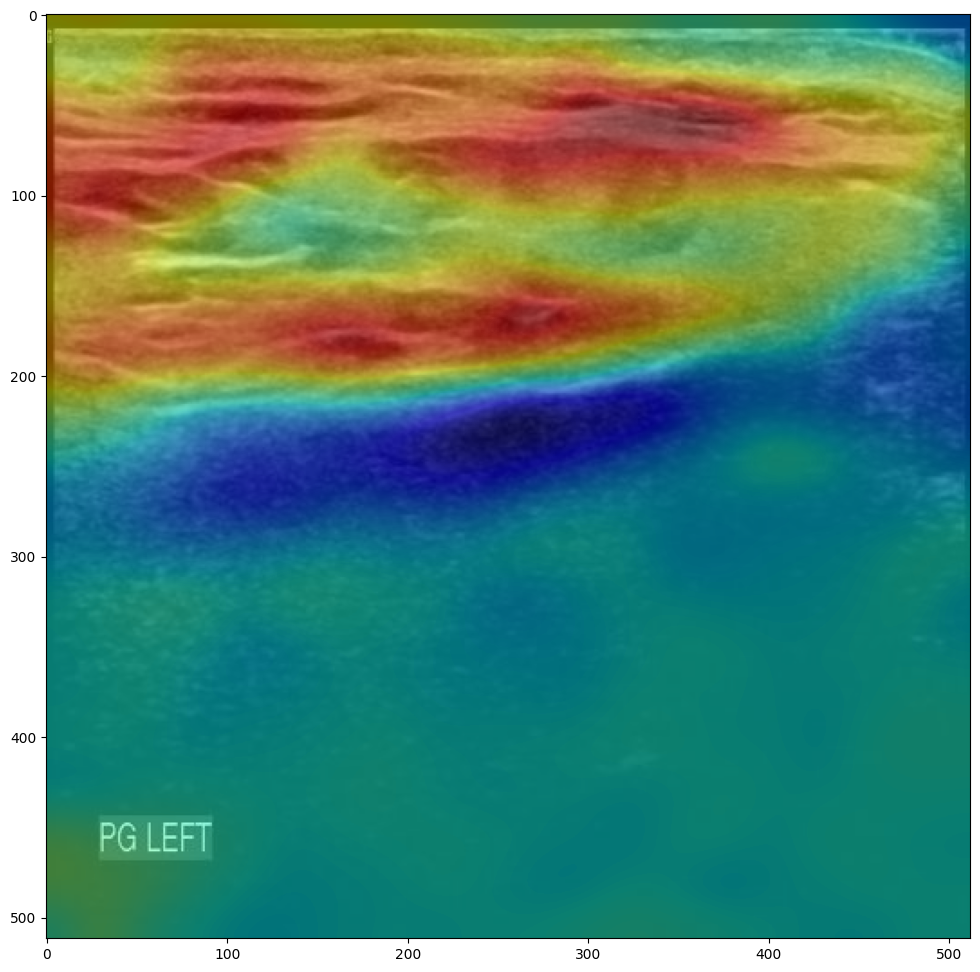

In [236]:
scale = 512 / 20
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.imshow(zoom(heatmap, zoom=(scale, scale)), cmap='jet', alpha=0.5)